In [1]:
import os
import pickle
import glob
import pandas as pd
from collections import Counter

def count_word_frequency_all_subreddits(base_dir, min_freq=50, output_dir="word_freq_csv"):
    """
    For each subreddit in base_dir, count word frequency from all pkl files,
    and save words with frequency > min_freq to a CSV file.
    """
    os.makedirs(output_dir, exist_ok=True)
    subreddits = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    for subreddit in subreddits:
        input_dir = os.path.join(base_dir, subreddit)
        pattern = os.path.join(input_dir, f"{subreddit}_batch*.pkl")
        files = sorted(glob.glob(pattern))
        word_counter = Counter()
        for file_path in files:
            with open(file_path, "rb") as f:
                comments = pickle.load(f)
            for comment in comments:
                words = comment.get("processed_text", [])
                word_counter.update(words)
        freq_items = [(word, freq) for word, freq in word_counter.items() if freq > min_freq]
        freq_items.sort(key=lambda x: x[1], reverse=True)
        df = pd.DataFrame(freq_items, columns=["word", "frequency"])
        out_csv = os.path.join(output_dir, f"{subreddit}_word_freq.csv")
        df.to_csv(out_csv, index=False)
        print(f"Saved {len(df)} words for {subreddit} to {out_csv}")

# 用法示例
count_word_frequency_all_subreddits(base_dir="processed_comments_1", min_freq=50, output_dir="word_freq_csv")

Saved 10576 words for backpacking to word_freq_csv\backpacking_word_freq.csv
Saved 44091 words for books to word_freq_csv\books_word_freq.csv
Saved 34944 words for conservative to word_freq_csv\conservative_word_freq.csv
Saved 28373 words for cooking to word_freq_csv\cooking_word_freq.csv
Saved 14150 words for democrats to word_freq_csv\democrats_word_freq.csv
Saved 88253 words for gaming to word_freq_csv\gaming_word_freq.csv
Saved 8662 words for liberal to word_freq_csv\liberal_word_freq.csv
Saved 73882 words for movies to word_freq_csv\movies_word_freq.csv
Saved 32040 words for personalfinance to word_freq_csv\personalfinance_word_freq.csv
Saved 12618 words for republican to word_freq_csv\republican_word_freq.csv
Saved 54831 words for technology to word_freq_csv\technology_word_freq.csv
Saved 30042 words for travel to word_freq_csv\travel_word_freq.csv
Saved 8285 words for vagabond to word_freq_csv\vagabond_word_freq.csv


In [1]:
import pandas as pd
import glob
import os

def get_top_n_words_from_csv(csv_path, n=2000):
    df = pd.read_csv(csv_path)
    return set(df.sort_values("frequency", ascending=False).head(n)["word"])

def get_global_overlap_words(csv_dir, n=2000):
    """
    Find the overlap words among the top n words of all subreddits in csv_dir.
    """
    csv_files = glob.glob(os.path.join(csv_dir, "*_word_freq.csv"))
    top_words_list = [get_top_n_words_from_csv(f, n) for f in csv_files]
    if not top_words_list:
        print("No CSV files found.")
        return set()
    overlap = set.intersection(*top_words_list)
    print(f"Top {n} overlap words among all subreddits: {len(overlap)}")
    return overlap

# 用法示例
overlap = get_global_overlap_words("word_freq_csv", n=5000)
print(overlap)

Top 5000 overlap words among all subreddits: 2217
{'equivalent', 'sink', 'already', 'perspective', 'hell', 'curiosity', 'candy', 'react', 'replace', 'stream', 'reader', 'pay', 'whatsoever', 'meal', 'strict', 'imho', 'approach', 'poorly', 'item', 'alive', 'would', 'walking', 'piece', 'plant', 'convince', 'canada', 'rest', 'old', 'meat', 'interesting', 'wild', 'associate', 'sport', 'evening', 'meh', 'suppose', 'dirty', 'tie', 'lock', 'suck', 'accident', 'scale', 'among', 'shot', 'couple', 'anyway', 'cash', 'steam', 'understanding', 'split', 'ride', 'thankfully', 'holy', 'horse', 'realise', 'cloud', 'tag', 'danger', 'agent', 'san', 'increase', 'attention', 'abuse', 'commit', 'fool', 'bomb', 'drive', 'real', 'awkward', 'downvoted', 'sign', 'cant', 'reduced', 'cent', 'technically', 'ahead', 'altogether', 'superior', 'skills', 'easy', 'clean', 'vehicle', 'angry', 'performance', 'alright', 'roll', 'norm', 'reminder', 'boil', 'introduce', 'unknown', 'refused', 'texas', 'force', 'factory', 'pro

In [2]:
def load_google_vocab(filepath, top_n=5000):
    with open(filepath, "r", encoding="utf-8") as f:
        words = [line.strip() for line in f.readlines()]
    return set(words[:top_n])

google_vocab = load_google_vocab("word_freq_csv/google-10000-english-usa.txt", top_n=2000)
overlap_with_google = overlap & google_vocab
print(f"Overlap with Google top 2k: {len(overlap_with_google)}")
print(overlap_with_google)

Overlap with Google top 2k: 1007
{'society', 'fast', 'question', 'express', 'already', 'american', 'future', 'know', 'throughout', 'east', 'book', 'reply', 'police', 'whole', 'camera', 'boy', 'reader', 'science', 'pay', 'canadian', 'stuff', 'bed', 'shall', 'inside', 'approach', 'morning', 'waste', 'super', 'web', 'get', 'topic', 'item', 'section', 'great', 'big', 'chat', 'first', 'work', 'employee', 'would', 'piece', 'mail', 'quick', 'guy', 'plant', 'favorite', 'allow', 'canada', 'saturday', 'end', 'result', 'month', 'rest', 'think', 'jack', 'create', 'old', 'listen', 'etc', 'interesting', 'official', 'culture', 'sport', 'plus', 'bit', 'born', 'vote', 'minimum', 'like', 'stock', 'object', 'believe', 'since', 'well', 'energy', 'auto', 'expected', 'central', 'local', 'scale', 'track', 'gas', 'among', 'forward', 'advertising', 'nature', 'shot', 'cash', 'couple', 'technology', 'understanding', 'program', 'western', 'aid', 'connect', 'format', 'die', 'particular', 'photo', 'treatment', 'dou

In [3]:
import gensim

input_dir = "models/chunk_1"
democrats_before_2016 = gensim.models.Word2Vec.load(f"{input_dir}/democrats_before_2016.model")
democrats_2017_2020 = gensim.models.Word2Vec.load(f"{input_dir}/democrats_2017_2020.model")
democrats_2021_2024 = gensim.models.Word2Vec.load(f"{input_dir}/democrats_2021_2024.model")
republican_before_2016 = gensim.models.Word2Vec.load(f"{input_dir}/republican_before_2016.model")
republican_2017_2020 = gensim.models.Word2Vec.load(f"{input_dir}/republican_2017_2020.model")
republican_2021_2024 = gensim.models.Word2Vec.load(f"{input_dir}/republican_2021_2024.model")

In [4]:
model_list = [
    ("democrats_before_2016", democrats_before_2016),
    ("democrats_2017_2020", democrats_2017_2020),
    ("democrats_2021_2024", democrats_2021_2024),
    ("republican_before_2016", republican_before_2016),
    ("republican_2017_2020", republican_2017_2020),
    ("republican_2021_2024", republican_2021_2024),
]

model_words_list = [
    set(model.wv.key_to_index.keys())
    for _, model in model_list
]

# compute overall overlap
all_overlap = set.intersection(*model_words_list, overlap_with_google)
print(f"All models & google vocab overlap: {len(all_overlap)}")
print(sorted(all_overlap))

All models & google vocab overlap: 993
['ability', 'able', 'accept', 'accepted', 'access', 'account', 'across', 'act', 'action', 'active', 'activity', 'actual', 'actually', 'add', 'addition', 'additional', 'address', 'adult', 'advance', 'advertising', 'advice', 'age', 'agent', 'ago', 'agree', 'aid', 'air', 'allow', 'almost', 'along', 'already', 'also', 'alternative', 'although', 'always', 'amazon', 'america', 'american', 'among', 'amount', 'animal', 'another', 'answer', 'anti', 'anyone', 'anything', 'appear', 'apple', 'apply', 'approach', 'appropriate', 'area', 'army', 'around', 'art', 'article', 'asian', 'ask', 'attention', 'australia', 'australian', 'author', 'authority', 'auto', 'available', 'average', 'award', 'away', 'baby', 'back', 'background', 'bad', 'bag', 'balance', 'ball', 'band', 'bank', 'bar', 'base', 'basic', 'basis', 'bay', 'beach', 'beautiful', 'become', 'bed', 'begin', 'behind', 'believe', 'benefit', 'best', 'beyond', 'big', 'bill', 'bit', 'black', 'block', 'blog', 'bl

In [5]:
import numpy as np
import pandas as pd
import gensim
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt

def compare_subreddit_embeddings_by_period(model1, model2, subreddit1_name, subreddit2_name, time_period, anchor_words, output_file=None):
    """Compare two word2vec models by aligning their vector spaces and measuring word similarities"""
    # Find common vocabulary
    vocab1 = set(model1.wv.index_to_key)
    vocab2 = set(model2.wv.index_to_key)
    
    anchor = [w for w in anchor_words if w in vocab1 and w in vocab2]
    print(f"{time_period}: Anchor words between {subreddit1_name} and {subreddit2_name}: {len(anchor)} words")
    if len(anchor) == 0:
        print("No anchor words found in both models.")
        return None
    
    anchor_vecs1 = np.array([model1.wv[w] for w in anchor])
    anchor_vecs2 = np.array([model2.wv[w] for w in anchor])
    anchor_vecs1 = anchor_vecs1 - anchor_vecs1.mean(axis=0, keepdims=True)
    anchor_vecs2 = anchor_vecs2 - anchor_vecs2.mean(axis=0, keepdims=True)
    anchor_vecs1 = anchor_vecs1 / np.linalg.norm(anchor_vecs1, axis=1, keepdims=True)
    anchor_vecs2 = anchor_vecs2 / np.linalg.norm(anchor_vecs2, axis=1, keepdims=True)
    m = anchor_vecs1.T @ anchor_vecs2
    u, _, vt = np.linalg.svd(m)
    rotation = u @ vt
    
    common_vocab = list(vocab1.intersection(vocab2))
    print(f"{time_period}: Anchor words: {len(anchor)}, Common vocab: {len(common_vocab)}")
    vecs1 = np.array([model1.wv[w] for w in common_vocab])
    vecs2 = np.array([model2.wv[w] for w in common_vocab])
    vecs1 = vecs1 - vecs1.mean(axis=0, keepdims=True)
    vecs2 = vecs2 - vecs2.mean(axis=0, keepdims=True)
    vecs1 = vecs1 / np.linalg.norm(vecs1, axis=1, keepdims=True)
    vecs2 = vecs2 / np.linalg.norm(vecs2, axis=1, keepdims=True)
    vecs2_aligned = vecs2 @ rotation

    similarities = []
    for i, word in enumerate(common_vocab):
        sim = cosine_similarity(vecs1[i].reshape(1, -1), vecs2_aligned[i].reshape(1, -1))[0][0]
        similarities.append((word, sim))

    df = pd.DataFrame(similarities, columns=['word', 'similarity'])
    df = df.sort_values('similarity')

    if output_file:
        os.makedirs(os.path.dirname(output_file), exist_ok=True)
        df.to_csv(output_file, index=False)

    return df

# Define input directory where models are stored
input_dir = "models/chunk_1"
# Define output directory
output_dir = "output/chunk_2"
os.makedirs(output_dir, exist_ok=True)

# Define all pairs and periods to compare
subreddit_pairs = [
    ("republican", "democrats")
]
periods = ["before_2016", "2017_2020", "2021_2024"]

# Load all models into a dict for easy access
model_names = ["democrats", "republican"]
models = {}
for name in model_names:
    models[name] = {}
    for period in periods:
        models[name][period] = gensim.models.Word2Vec.load(f"{input_dir}/{name}_{period}.model")

# Compare all pairs for all periods and save results
for sub1, sub2 in subreddit_pairs:
    for period in periods:
        output_file = f"{output_dir}/{sub1}_{sub2}_{period}.csv"
        compare_subreddit_embeddings_by_period(
            models[sub1][period],
            models[sub2][period],
            sub1,
            sub2,
            period,
            anchor_words=all_overlap,
            output_file=output_file
        )

print(f"Results saved to {output_dir}")
print("\nAnalysis complete.")

before_2016: Anchor words between republican and democrats: 993 words
before_2016: Anchor words: 993, Common vocab: 10764
2017_2020: Anchor words between republican and democrats: 993 words
2017_2020: Anchor words: 993, Common vocab: 15630
2021_2024: Anchor words between republican and democrats: 993 words
2021_2024: Anchor words: 993, Common vocab: 19084
Results saved to output/chunk_2

Analysis complete.


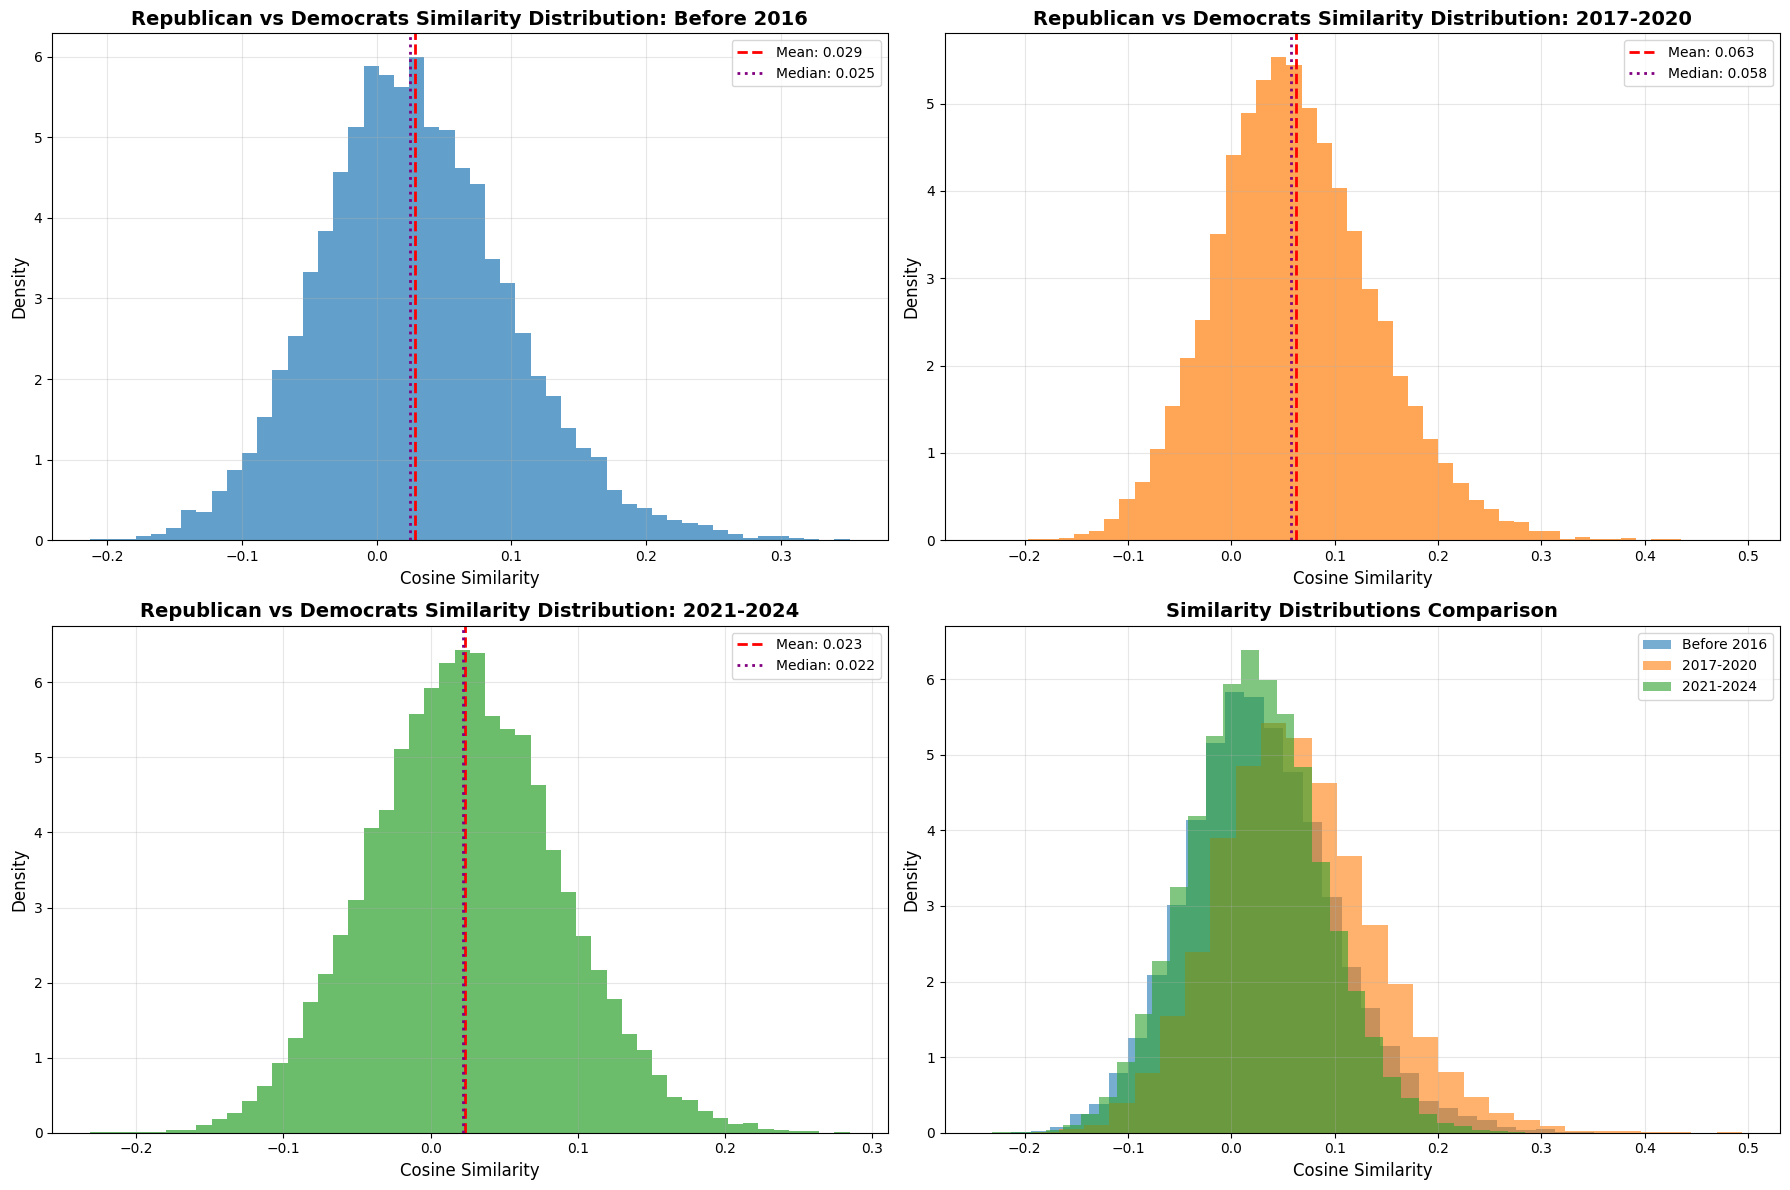

In [6]:
def analyze_similarity_distributions(output_dir, df_before_2016, df_2017_2020, df_2021_2024, subreddit1, subreddit2):
    """Analyze how cosine similarity distributions change over time"""
    
    # Prepare data
    dataframes = [df_before_2016, df_2017_2020, df_2021_2024]
    period_names = ['Before 2016', '2017-2020', '2021-2024']
    
    # Create the plot
    plt.figure(figsize=(18, 12))
    
    # Main distribution plots
    for i, (df, period) in enumerate(zip(dataframes, period_names)):
        plt.subplot(2, 2, i+1)
        
        # Create histogram
        plt.hist(df['similarity'], bins=50, alpha=0.7, density=True, 
                color=['#1f77b4', '#ff7f0e', '#2ca02c'][i])
        
        # Add statistics
        mean_sim = df['similarity'].mean()
        median_sim = df['similarity'].median()
        
        plt.axvline(mean_sim, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {mean_sim:.3f}')
        plt.axvline(median_sim, color='purple', linestyle=':', linewidth=2,
                   label=f'Median: {median_sim:.3f}')

        plt.title(f'{subreddit1} vs {subreddit2} Similarity Distribution: {period}', fontsize=14, fontweight='bold')
        plt.xlabel('Cosine Similarity', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # Combined comparison plot
    plt.subplot(2, 2, 4)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    for i, (df, period, color) in enumerate(zip(dataframes, period_names, colors)):
        plt.hist(df['similarity'], bins=30, alpha=0.6, density=True, 
                label=period, color=color)
    
    plt.title('Similarity Distributions Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Cosine Similarity', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{subreddit1}_{subreddit2}_similarity_distributions.png")
    plt.show()


input_dir = "output/chunk_2"
# Run the analysis
subreddit_pairs = [
    ("republican", "democrats")
]
periods = ["before_2016", "2017_2020", "2021_2024"]

for sub1, sub2 in subreddit_pairs:
    dfs = []
    for period in periods:
        csv_path = f"{input_dir}/{sub1}_{sub2}_{period}.csv"
        dfs.append(pd.read_csv(csv_path))
    analyze_similarity_distributions(
        input_dir,
        dfs[0], dfs[1], dfs[2],
        sub1.capitalize(), sub2.capitalize()
    )

In [1]:
import os
import pickle
import glob
import pandas as pd
from collections import Counter, defaultdict

def count_word_frequency_by_year(base_dir, target_words=None, output_dir="word_freq_yearly"):
    """
    统计每个subreddit每年每个词的词频，保存为csv
    如果target_words为None，则统计所有词，否则只统计target_words中的词
    """
    os.makedirs(output_dir, exist_ok=True)
    subreddits = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    for subreddit in subreddits:
        input_dir = os.path.join(base_dir, subreddit)
        pattern = os.path.join(input_dir, f"{subreddit}_batch*.pkl")
        files = sorted(glob.glob(pattern))
        # year -> Counter
        yearly_counter = defaultdict(Counter)
        for file_path in files:
            with open(file_path, "rb") as f:
                comments = pickle.load(f)
            for comment in comments:
                words = comment.get("processed_text", [])
                # 获取年份
                date = comment.get("date")
                if date:
                    year = str(date)[:4]
                else:
                    ts = comment.get("timestamp")
                    if ts:
                        try:
                            year = pd.to_datetime(int(ts), unit="s").year
                        except Exception:
                            continue
                    else:
                        continue
                # 只统计目标词
                if target_words:
                    words = [w for w in words if w in target_words]
                yearly_counter[year].update(words)
        # 保存为csv
        rows = []
        for year, counter in yearly_counter.items():
            for word, freq in counter.items():
                rows.append({"year": year, "word": word, "frequency": freq})
        df = pd.DataFrame(rows)
        df = df.sort_values(["year", "frequency"], ascending=[True, False])
        out_csv = os.path.join(output_dir, f"{subreddit}_withstopwords_yearly.csv")
        df.to_csv(out_csv, index=False)
        print(f"Saved yearly word freq for {subreddit} to {out_csv}")

# 用法示例（统计所有词）
count_word_frequency_by_year(base_dir="processed_comments_2", target_words=None, output_dir="word_freq_yearly")

# 如果只统计某些词，比如 trump
# count_word_frequency_by_year(base_dir="processed_comments_2", target_words=["trump"], output_dir="word_freq_yearly")

import pandas as pd
import os

def pivot_yearly_word_freq_auto_years(input_csv, output_csv):
    """
    自动获取所有年份，将yearly词频csv转换为每行一个词，每列一个年份的格式
    """
    import pandas as pd
    df = pd.read_csv(input_csv)
    df["year"] = df["year"].astype(str)
    # 获取所有年份并排序
    all_years = sorted(df["year"].unique())
    # 透视表
    pivot = df.pivot_table(index="word", columns="year", values="frequency", fill_value=0)
    pivot = pivot.reindex(columns=all_years, fill_value=0)
    pivot.to_csv(output_csv)
    print(f"Saved pivoted word-year freq to {output_csv}")

# 用法示例
pivot_yearly_word_freq_auto_years(
    "word_freq_yearly/democrats_withstopwords_yearly.csv",
    "word_freq_yearly/democrats_withstopwords_year.csv"
)
pivot_yearly_word_freq_auto_years(
    "word_freq_yearly/republican_withstopwords_yearly.csv",
    "word_freq_yearly/republican_withstopwords_year.csv"
)

Saved yearly word freq for conservative to word_freq_yearly\conservative_withstopwords_yearly.csv
Saved yearly word freq for democrats to word_freq_yearly\democrats_withstopwords_yearly.csv
Saved yearly word freq for liberal to word_freq_yearly\liberal_withstopwords_yearly.csv
Saved yearly word freq for republican to word_freq_yearly\republican_withstopwords_yearly.csv
Saved pivoted word-year freq to word_freq_yearly/democrats_withstopwords_year.csv
Saved pivoted word-year freq to word_freq_yearly/republican_withstopwords_year.csv
